# Orthogonality in Potapov modes

The modes of a system will not always be orthogonal because some of the signal leaks out of the system. Let's use the Potapov analysis for a specific example to determine when the orthogonality approximation can be made.

The example used here is example 3 in our code, which corresponds to figure 7 in our paper. This example is formed by two inter-linked cavities with two inputs and outputs.

In [2]:
import Roots
import Potapov
import Examples
import Time_Sims
import functions
import tests

import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def contour_plot(Mat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(abs(Mat), interpolation='nearest')
    fig.colorbar(cax)
    plt.show()

In [4]:
def run_example3(r1 = 0.999,r2=0.4, r3 = 0.999):
    Ex = Examples.Example3(r1=r1,r2=r2,r3=r3,max_freq=50.,max_linewidth=35.)
    Ex.run_Potapov()
    E = Ex.E
    roots = Ex.roots
    M1 = Ex.M1
    delays = Ex.delays
    modes = functions.spatial_modes(roots,M1,E)
    Mat = functions.make_normalized_inner_product_matrix(roots,modes,delays)
    #contour_plot(Mat)
    
    #for root,mode in zip(roots,modes):
    #    print root,mode
    return Mat

In [5]:
rs = [.01,0.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,.99,.999]

## Varying r1 and r3 -- the input-output mirrors

In [6]:
Ms = {}
for r in rs:
    Ms[r] = run_example3(r1=r,r3=r)

Examples.py:175: RuntimeWarning: overflow encountered in exp
  [0,np.exp(-tau2*z),0,0],
Examples.py:177: RuntimeWarning: overflow encountered in exp
  [0,0,0,np.exp(-tau4*z)]])
/Users/gil/anaconda/lib/python2.7/site-packages/numpy/linalg/linalg.py:1776: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
Examples.py:174: RuntimeWarning: overflow encountered in exp
  E = lambda z: np.matrix([[np.exp(-tau1*z),0,0,0],
Examples.py:176: RuntimeWarning: overflow encountered in exp
  [0,0,np.exp(-tau3*z),0],
Roots.py:75: RuntimeWarning: overflow encountered in cdouble_scalars
  D1 = B+cm.sqrt(B**2-4.*A*C)
Roots.py:75: RuntimeWarning: invalid value encountered in cdouble_scalars
  D1 = B+cm.sqrt(B**2-4.*A*C)
Roots.py:76: RuntimeWarning: overflow encountered in cdouble_scalars
  D2 = B-cm.sqrt(B**2-4.*A*C)
Roots.py:76: RuntimeWarning: invalid value encountered in cdouble_scalars
  D2 = B-cm.sqrt(B**2-4.*A*C)
/Users/gil/anaconda/lib/python2.7/site-pac

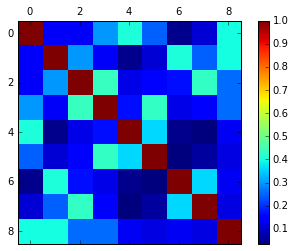

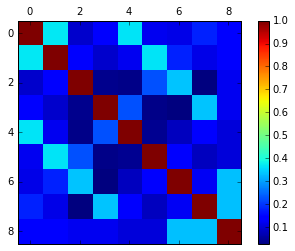

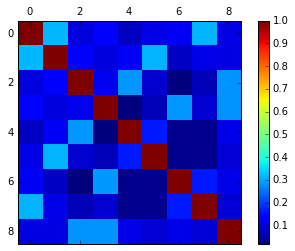

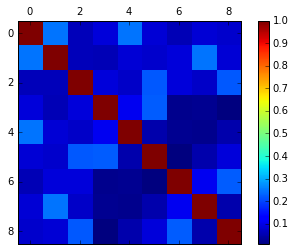

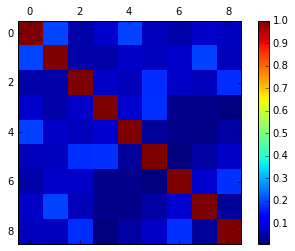

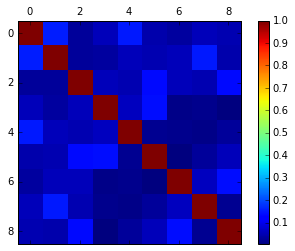

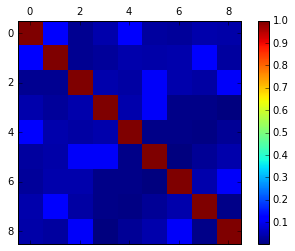

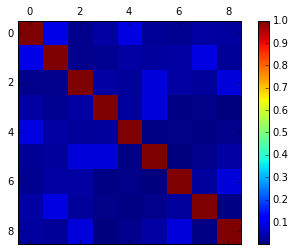

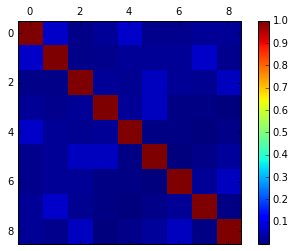

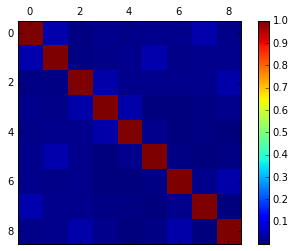

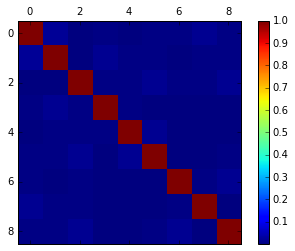

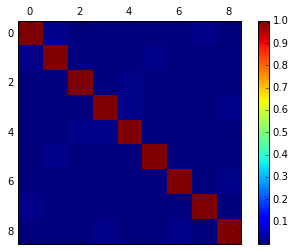

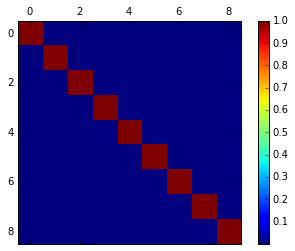

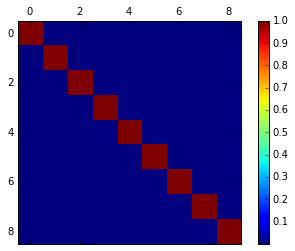

In [7]:
for r in rs:
    contour_plot(Ms[r])

In [26]:
err = {}
for r in rs:
    dim = Ms[r].shape[-1]
    err[r] =  np.sqrt(sum( (Ms[r] - np.matrix(np.eye(dim)))**2 )).real/(dim*(dim-1))

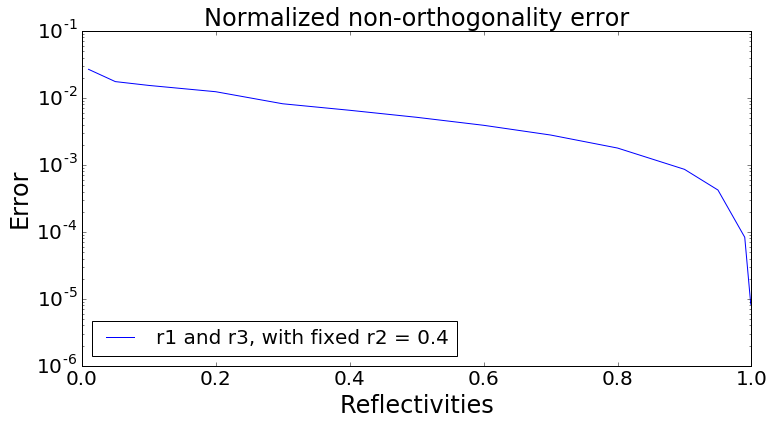

In [42]:
plt.figure(figsize = (12,6))
plt.plot(rs,[err[r] for r in rs],label='r1 and r3, with fixed r2 = 0.4')
plt.yscale('log')
plt.xlabel('Reflectivities',{'fontsize': 24})
plt.title('Normalized non-orthogonality error',{'fontsize': 24})
plt.ylabel('Error',{'fontsize': 24})
plt.yticks( size=20)
plt.xticks( size=20)
plt.legend(loc='lower left',fontsize=20)
plt.savefig('orth_err.pdf')

## Varying r1 with constant r3=1

In [10]:
Ms0 = {}
for r in rs:
    Ms0[r] = run_example3(r1=r,r3=1.)

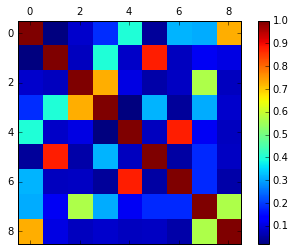

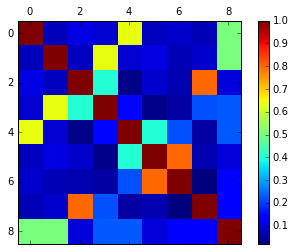

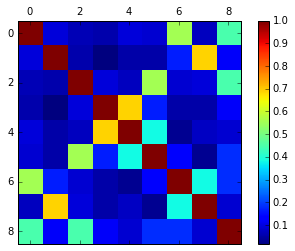

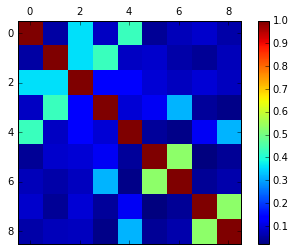

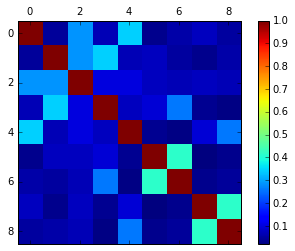

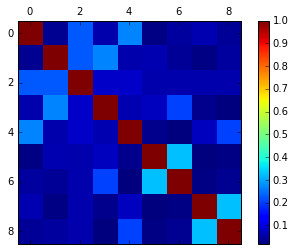

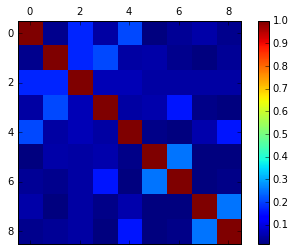

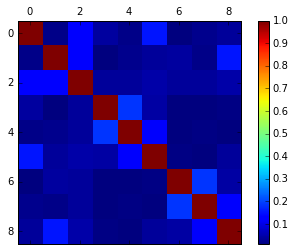

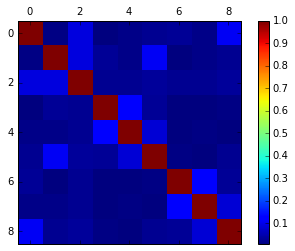

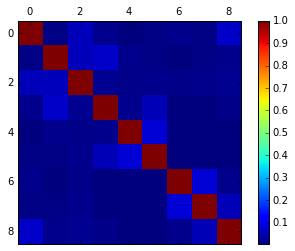

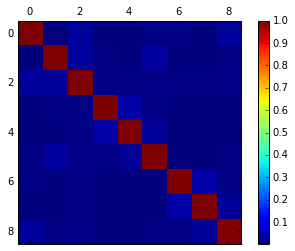

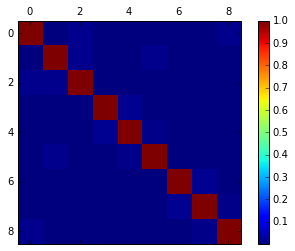

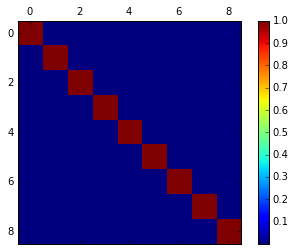

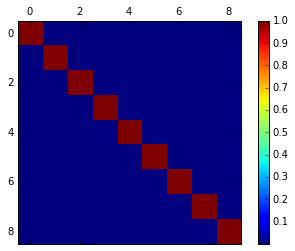

In [11]:
for r in rs:
    contour_plot(Ms0[r])

In [44]:
err0 = {}
for r in rs:
    dim = Ms0[r].shape[-1]
    err0[r] =  np.sqrt(sum( (Ms0[r] - np.matrix(np.eye(dim)))**2 )).real/(dim*(dim-1))

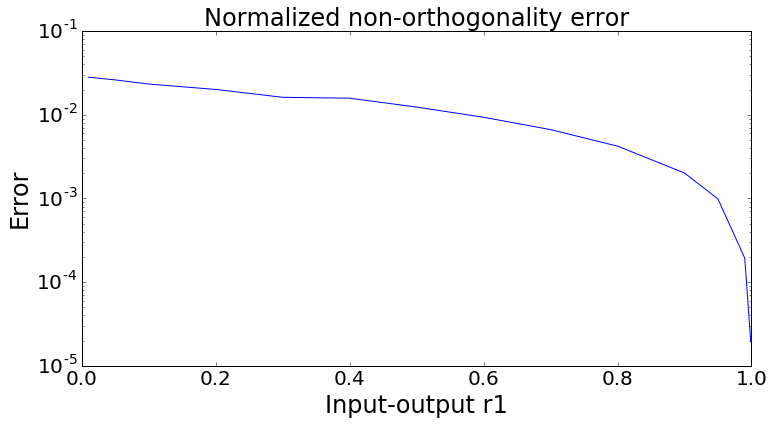

In [46]:
plt.figure(figsize = (12,6))
plt.plot(rs,[err0[r] for r in rs])
plt.yscale('log',size=32)
plt.xlabel('Input-output r1',{'fontsize': 24})
plt.title('Normalized non-orthogonality error',{'fontsize': 24})
plt.ylabel('Error',{'fontsize': 24})
plt.yticks( size=20)
plt.xticks( size=20)
plt.savefig('orth_err.pdf')

## Varying r2-- the internal mirror

In [30]:
Ms2 = {}
for r in rs:
    Ms2[r] = run_example3(r1=.9,r2 = r,r3=.9)

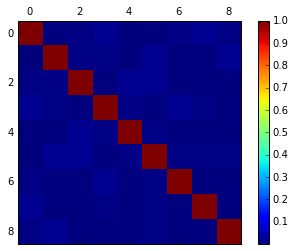

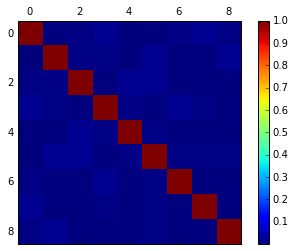

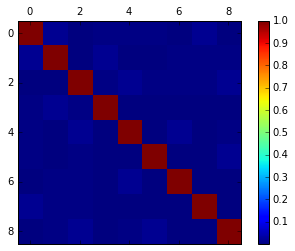

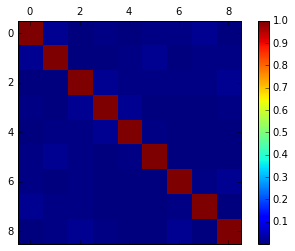

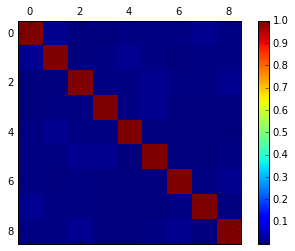

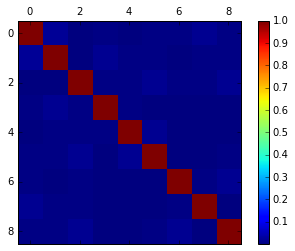

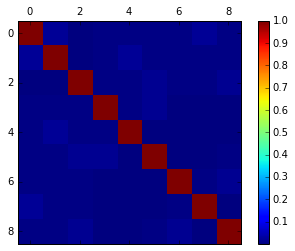

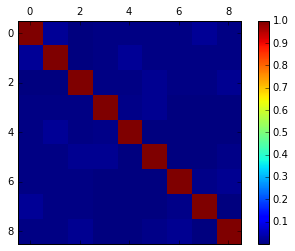

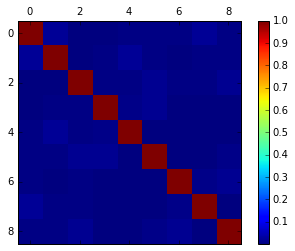

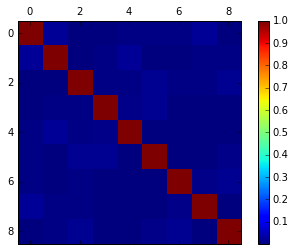

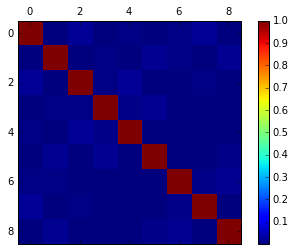

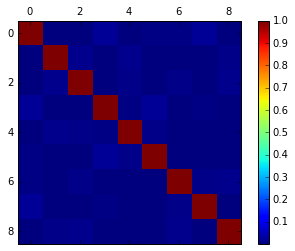

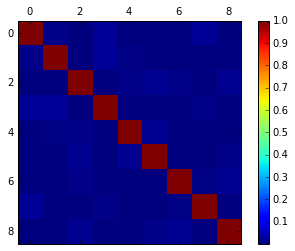

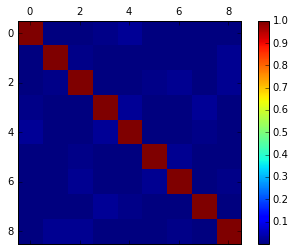

In [31]:
for r in rs:
    contour_plot(Ms2[r])

In [49]:
err2 = {}
for r in rs:
    dim = Ms2[r].shape[-1]
    err2[r] =  np.sqrt(sum( (Ms2[r] - np.matrix(np.eye(dim)))**2 )).real/(dim*(dim-1))

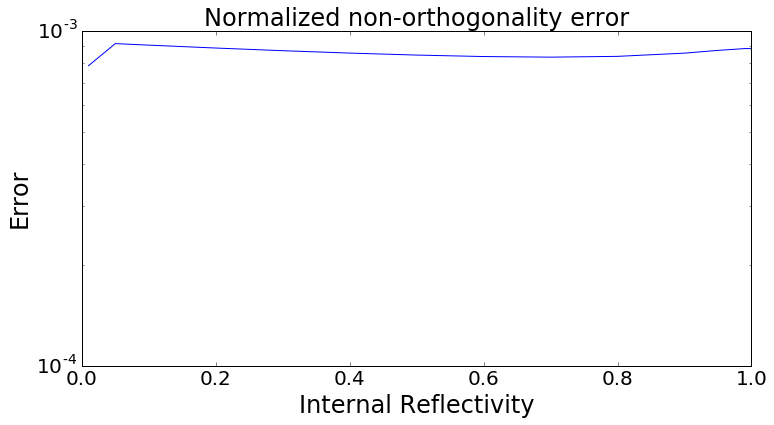

In [50]:
plt.figure(figsize = (12,6))
plt.plot(rs,[err2[r] for r in rs])
plt.yscale('log')
plt.xlabel('Internal Reflectivity',{'fontsize': 24})
plt.title('Normalized non-orthogonality error',{'fontsize': 24})
plt.ylabel('Error',{'fontsize': 24})
plt.yticks( size=20)
plt.xticks( size=20)
plt.savefig('orth_err.pdf')

# Plot all 3 together

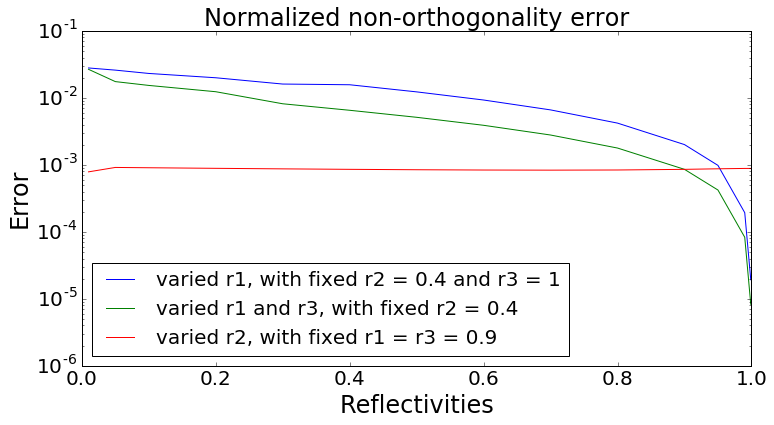

In [56]:
plt.figure(figsize = (12,6))
plt.plot(rs,[err0[r] for r in rs],label='varied r1, with fixed r2 = 0.4 and r3 = 1')
plt.plot(rs,[err[r] for r in rs],label='varied r1 and r3, with fixed r2 = 0.4')
plt.plot(rs,[err2[r] for r in rs],label='varied r2, with fixed r1 = r3 = 0.9')

plt.yscale('log')
plt.xlabel('Reflectivities',{'fontsize': 24})
plt.title('Normalized non-orthogonality error',{'fontsize': 24})
plt.ylabel('Error',{'fontsize': 24})
plt.yticks( size=20)
plt.xticks( size=20)
plt.legend(loc='lower left',fontsize=20)
plt.savefig('orth_err.pdf')